### Derivative of a simple function with one input

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2727]:
def f(x):
    return 3*x**2 - 4*x + 5 # 3x^2 - 4x + 5

In [2728]:
f(3.0)

20.0

In [2729]:
# A set of scalar values to make a numpy array
xs = np.arange(-5, 5, 0.25) # -5 to 5 (not including 5) with steps of 0.25
xs # read as "exes" as in plural of x

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [2730]:
ys = f(xs)
ys # read as "ys" as in plural of y

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

#### Plotting this wit matplotlip

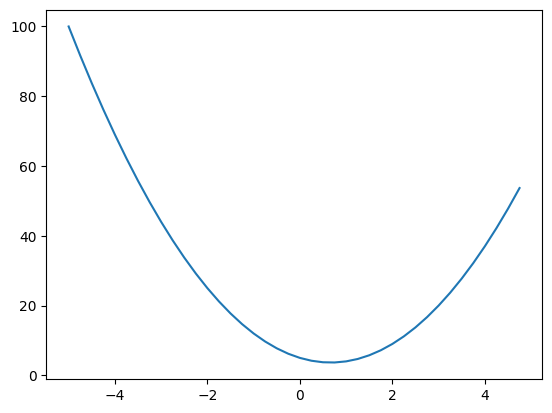

In [2731]:
plt.plot(xs, ys) # a nice parabola

#### Evaluating the derivative numerically
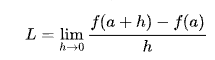

In [2732]:
h = 0.000000001 ## that slight change that can manipulate our function
x = 2/3
# f(x + h) - f(x) --> (this is how much our function responded)
(f(x + h) - f(x)) / h # normalizing the rise over run (aka change in y divided by change in x {in this case it's h}), basically the slope! 

# note: h is often called "epsilon"

0.0

#### Getting more complex here

In [2733]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [2734]:
# what is the derivative of d w.r.t. a, b, and c?
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c #d1 is a function, we can understand it as f(a,b,c)
a += h
d2 = a*b + c # a is slightly bumped up with h for this

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h) # d2 - d1 is basically how much the function increased when we bumped the input (a) by a tiny amount (h)

d1 4.0
d2 3.9999699999999994
slope -3.000000000064062


This is a numerical derivative. The primary reason for calculating the slope between two functions (or, more precisely, the change in a function's output with respect to a small change in one of its inputs) is to approximate the derivative. In calculus, the derivative of a function at a point measures how the function's output changes as its input changes. This is crucial in many areas, including machine learning, optimization, and numerical analysis.

In the code example, we are calculating a numerical derivative. This approach is often used when:
- The function is too complex to differentiate analytically.
- We want to approximate the derivative for a given set of data points.

Let's take a look at some other changes below:

In [2735]:
## bumping b now
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.00002
slope 2.0000000000131024


In [2736]:
# bumping c
## bumping b now
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) / h)

d1 4.0
d2 4.00001
slope 0.9999999999621422


### NN from here

#### Building a value object

Here, init and repr are operators in the object. `__init__` is an initializer. `__repr__` means  `printable representation` of the given object.

We need to have a connective tissue of this expression. We need to know and keep pointers about what values produce other values. For this, we introuduce a new variable `_children`, a tuple (for now).

The 'operation' that created the resulting value will be denoted by `_op`. For addition, it will return `+`.

We will also add labels so that we'll know what variables are where. Representation: `label`

In [2737]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # takes a single scalar value that it wraps and keeps track of
        self._prev = set(_children) #_prev is a set
        self._op = _op
        self.label = label

    def __repr__(self): # this is a wrapper. providing us a nicer looking printout.
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # '+' here is not the + for numbers, it's a floating point + addition
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
# example:
a = Value(data=2.0, label='a')
b = Value(-3.0, label='b')
# a + b is basically doing a.__add__(b) here. Output: Value(data=-1.0)
c = Value (10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L' #output of our graph
L

Value(data=-8.0)

In [2738]:
## some scary ass code we don't need to understand for now, for visualization
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

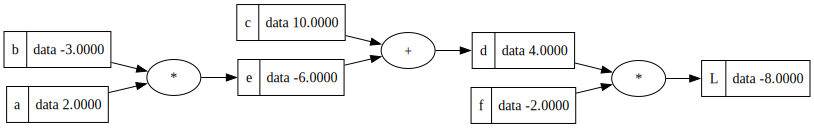

In [2739]:
draw_dot(L)

## Backpropagation

The above visualization is visualizing the forward pass (output is -8). 

Now, we want to run backpropagation, esentially start from L, travel the reverse direction, and calculate the gradient of all the intermediate values along the way. 

In other words, for every single intermediate value, we will be calculating the derivative of that node w.r.t. L.

---

We are now going to create a variable inside the Value class that maintains the derivative of L w.r.t. that value. We're adding this as `self.grad = 0` => means the default gradient = 0. Basically initializing the gradient.

In [2740]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # takes a single scalar value that it wraps and keeps track of
        self.grad = 0.0
        self._prev = set(_children) #_prev is a set
        self._op = _op
        self.label = label

    def __repr__(self): # this is a wrapper. providing us a nicer looking printout.
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # '+' here is not the + for numbers, it's a floating point + addition
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    # addition of tanh
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out
    
# example:
a = Value(data=2.0, label='a')
b = Value(-3.0, label='b')
# a + b is basically doing a.__add__(b) here. Output: Value(data=-1.0)
c = Value (10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L' #output of our graph
L

Value(data=-8.0)

In [2741]:
## Visualizing this
## some scary ass code we don't need to understand for now, for visualization
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

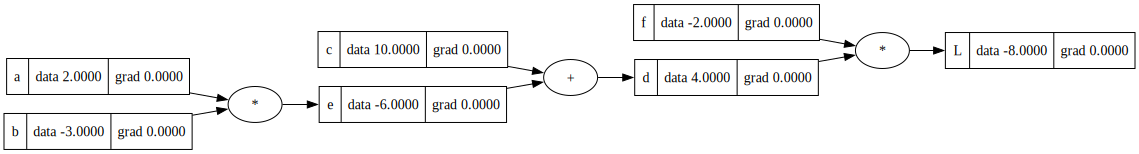

In [2742]:
draw_dot(L)

#### Filling in the gradients, manual backpropagation

In [2743]:
L.grad = 1 # because L is already the starting point, so derivative is 1 w.r.t. itself, no? yes.

In [2744]:
def lol(): # this fn is like a staging area for backprop, the Value class was getting quite long
    h = 0.0001 # adding a small amount of h

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value (10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0 + h, label='a') # adding h to a, measuring the deriative of L w.r.t. a
    b = Value(-3.0, label='b')
    c = Value (10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1) / h) # rise over run (deriative of L w.r.t. a)

lol()

6.000000000021544


---
Now, let's look at the derivatives of L w.r.t. d and f.

L = d * f<br>
we want to know what dL/dd is.

dL/dd = ?

definition of derivative is: (f(x+h) - f(x)) / h

=> ((d+h)*f - d*f / h (by the way, this f is not the f of `fx` used for the derivative notation.)</br> 
=> (d*f + h*f - d*f) / h<br>
=> f

Similarly, dL/df will be just `d`. Gradient for one is basically the value of the other (for d and f).

In [2745]:
f.grad = 4.0
d.grad = -2.0 # manually setting

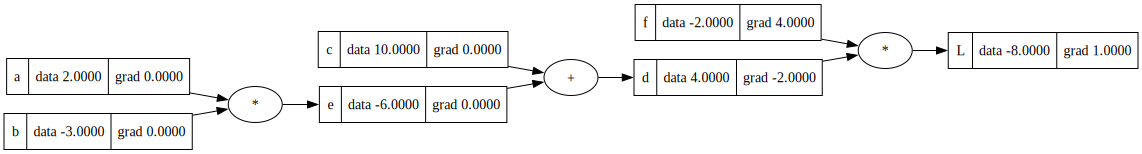

In [2746]:
# redrawing what we have again
draw_dot(L)

We can numerically verify the gradients as well by adding h to the individual variables in the `lol()` function. 

#### Most important part for this backpropagation

dL / dc

if we look at the figure, we can see that d affects L directly. c has a direct effect n d as well. which means obviously c has some kind of effect on L (not directly, but there is). How do we now figure out how c impacts L with this info?

---
Let's first try this with `dd/dc`.

d = c + e<br>
so, `dd/dc` is 1.0. ***

In the same manner, `dd/de` is also 1.0.

Let's call these local derivatives.

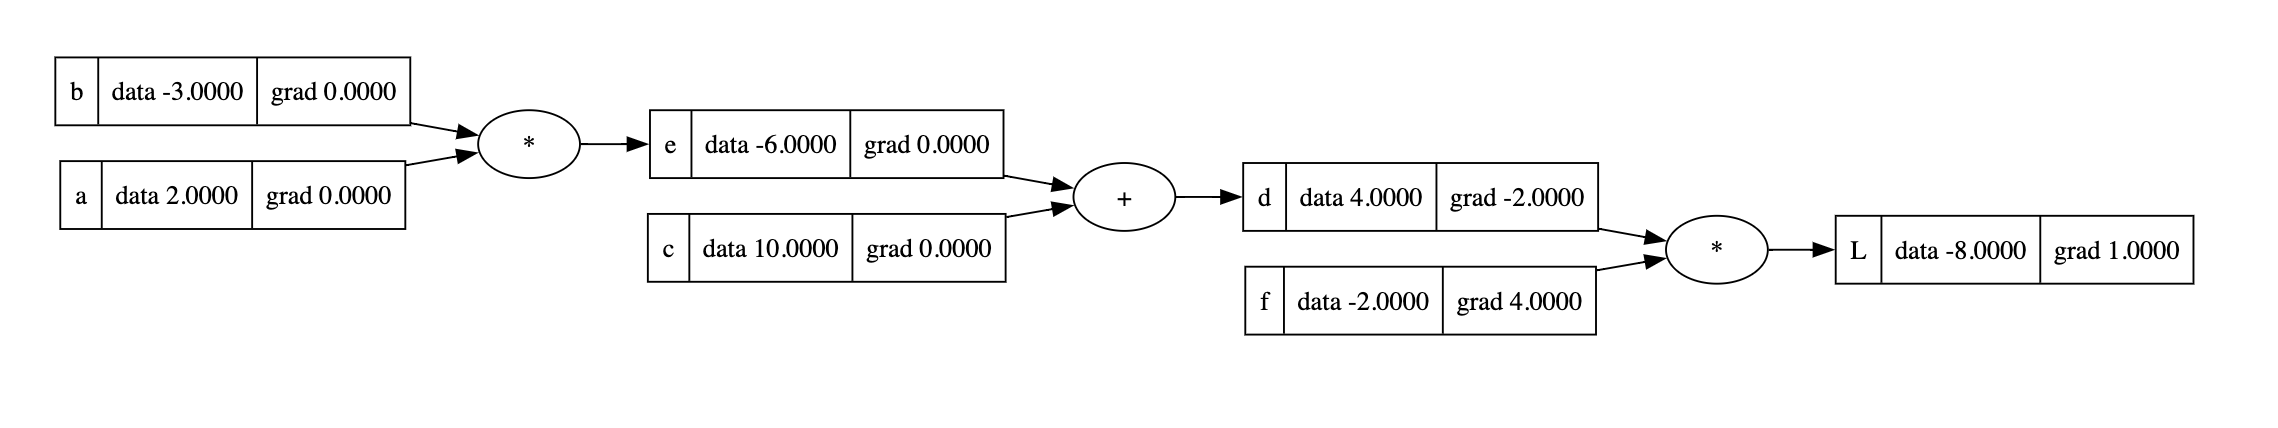

So, we know that L impacts d. We also know that c and e impact d. How do we put this info together?

**Chain Rule**.

$dy/dx = dy/du * du/dx$

And in our case:

WANT:<br>
dL / dc

KNOW:<br>
dL / dd = -2.0 (from the graph)<br>
dd / dc = 1.0 ***

So, the chain rule tells us:

$dL / dc = (dL / dd) * (dd / dc)$

=> -2.0 ($dd/dc$ was 1, so we can even think that: $dL / dc = dL / dd$)

In [2747]:
# therefore:
c.grad = -2.0
e.grad = -2.0 # by symmetry (remember that dL / de was also 1.0?)

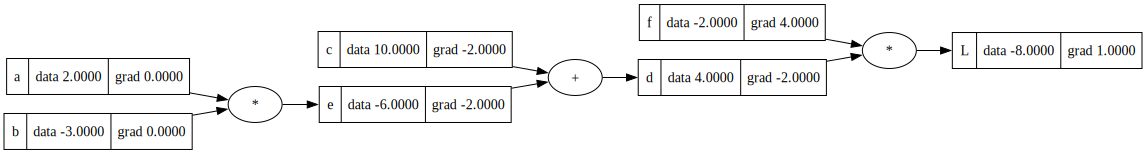

In [2748]:
# now let's look at the graph again with these set gradients
draw_dot(L)

#### Recursing our way further backwards (`*`)

WE KNOW:<br>
dL / de = -2.0

WE WANT:<br>
dL / da

This is basically:<br>
$dL / da = (dL / de) * (de / da)$

de / da = ?

we know that: e = a * b

$de / da = d(a * b) / da$<br>
=> b (which is -3.0).

<br>
So,

$dL / da = (dL / de) * (de / da)$

$= (-2.0) * (b)$

$= (-2.0) * (-3.0)$

$= 6.0$

In [2749]:
# therefore:
a.grad = (-2.0 * -3.0)
b.grad = (-2.0 * 2.0) #by symmetry

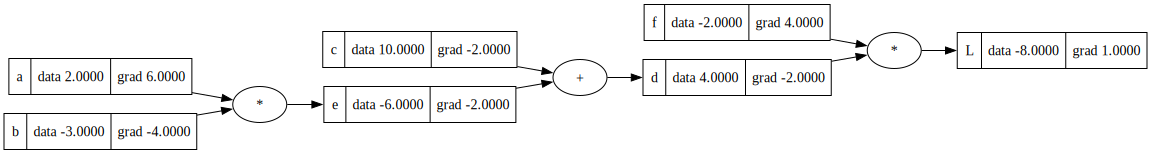

In [2750]:
# plotting
draw_dot(L)

This is basically what backpropagation is: iterating through all the nodes starting from the loss function L by locally applying the chain rule. So we just go through and recursively multiply on the local derivatives.

In other words, backpropagation = recursive application of chain rule backwards through the computation graph.

From wiki:
> Backpropagation computes the gradient of a loss function with respect to the weights of the network for a single input–output example, and does so efficiently, computing the gradient one layer at a time, iterating backward from the last layer to avoid redundant calculations of intermediate terms in the chain rule.

---
If we give the leaf nodes (basically the variables) a small nudge towards their gradients, we can expect a directly proportional effect on L. Let's have a look below.

In [2751]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


A positive change in L's value brought by adding small fraction of individial leaf nodes' gradients to their initial values.

#### Manual Backpropagation Example #2: **A Neuron**


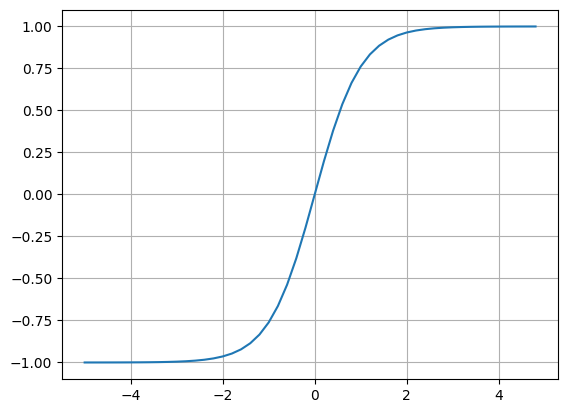

In [2752]:
# tanh sample:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid(); 

---
Let's initialize a 2-dimensional neuron below.

In a very high level, a biological neuron can be modeled into an artificial neuron as shown in the figure below (from [cs231n](https://cs231n.github.io/neural-networks-1/)).

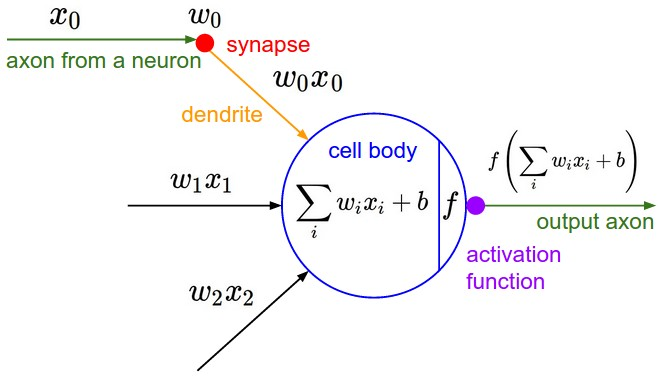

In [2753]:
# inputs x1, x2 (a 2-dimensional neuron)
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights w1, w2 (like the synaptic strings of a real biological neuron for each input)
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias of the neuron
b = Value(6.8813735870195432, label='b')

#basically what we're trying to do here is: x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n' #bascially is the activation without the activation function (if we look at the figure above, we can say n is the 'cell body' without the 'f' (activation function))

o = n.tanh(); o.label = 'o' # this basically is o = tanh(n) in math

Now, let's start our manual backpropagation.

In [2754]:
o.grad = 1.0

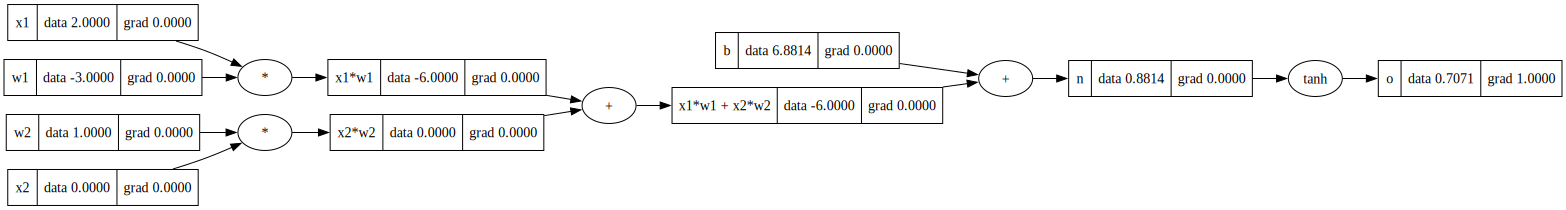

In [2755]:
draw_dot(o)

We know that: o = tanh(n) 

Derivative of tanh(x):

$d(tanh(x)/dx) = (1 - tanh^2(x))$ ([Derivatives section in wikipedia](https://en.wikipedia.org/wiki/Hyperbolic_functions))

Therefore:

$ do / dn = 1 - o^2 $

In [2756]:
n.grad = 0.5 # 1 - o.data**2 is 0.5

Similarly, as a chain rule:

$ d(o) / d(x1w1x2w2) = (d(o)) / d(n)) * ((d(n)) / d(x1w1x2w2))$

What we know:
d(o) / d(n) = 0.5 (n.grad)

and:

n = x1w1x2w2 + b

So, the chain rule becomes:

=> 0.5 * (d(x1w1x2w2 + b) / d(x1w1x2w2)) $

$= 0.5 * (d(x1w1x2w2)/ d(x1w1x2w2) + d(b) / d(x1w1x2w2)) $

$= 0.5 * ((1) + (0))$

$= 0.5$

Therefore, d(o) / d(x1w1x2w2) = 0.5

Similarly, by symmetry, d(o) / d(b) = 0.5.

Why though? Since o.grad is 1, the `+` node distributes the gradient to both of these equally.

In [2757]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

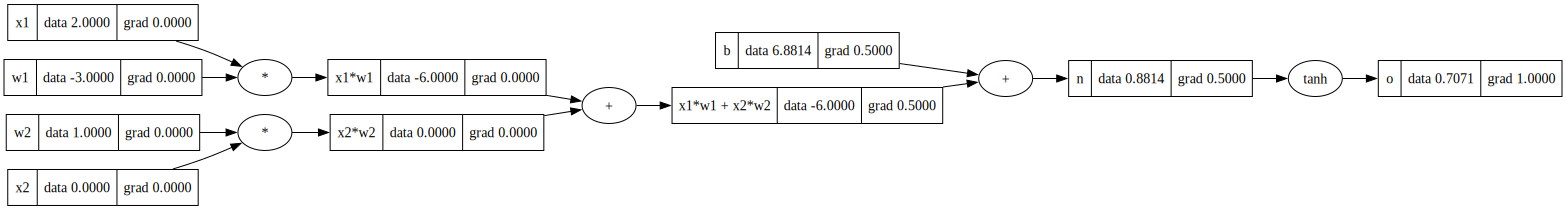

In [2758]:
draw_dot(o)

With the exact same logic, the gradients of both x2w2 and x1w1 will be 0.5.

In [2759]:
x1w1.grad = 0.5
x2w2.grad = 0.5

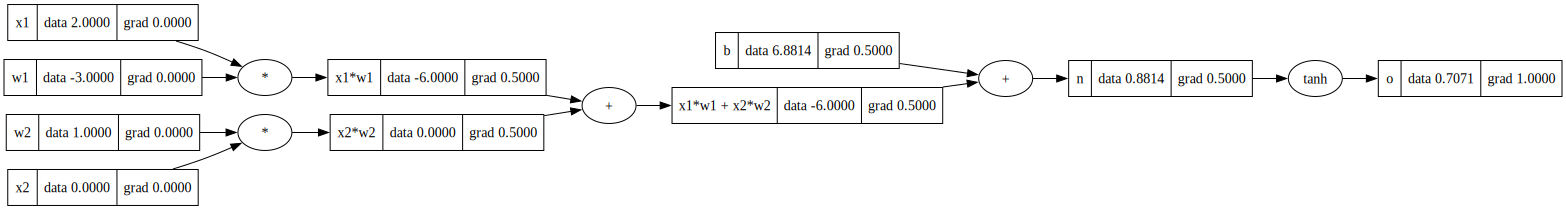

In [2760]:
draw_dot(o)

Now finally the `*` nodes! These are slightly different to the `+` node. But basically the same logic as the one we applied in our first backprop example.

x2.grad = ?

it is:

$d(o) / d(x2) = (d(o) / d(x2w2)) * ((d(x2w2)) / d(x2))$

$= 0.5 * w2$

$= 0.5 * 1$

$= 0.5$

In [2761]:
#therefore:
x2.grad = x2w2.grad * w2.data

#with the exact same logic,
w2.grad = x2w2.grad * x2.data

x2.grad, w2.grad

(0.5, 0.0)

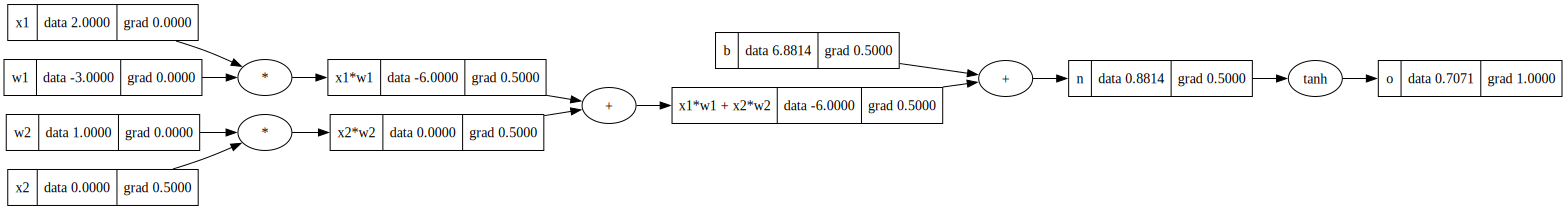

In [2762]:
draw_dot(o)

Let's do the same with x1 and w1!

In [2763]:
x1.grad = x1w1.grad * w1.data
w1.grad = x1w1.grad * x1.data

x1.grad, w1.grad

(-1.5, 1.0)

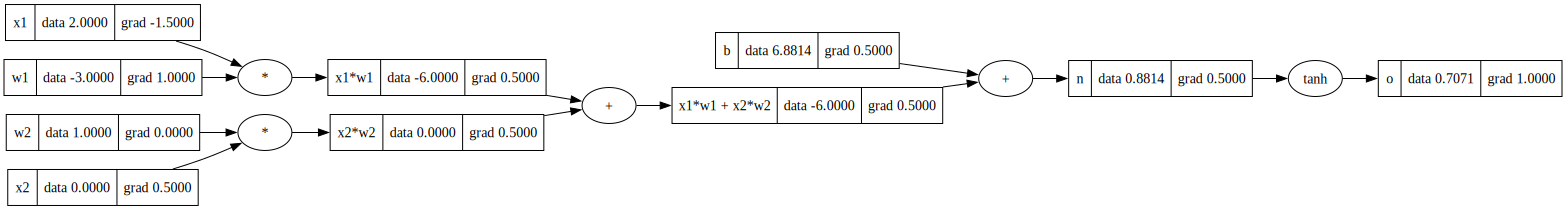

In [2764]:
draw_dot(o)

---

#### Implementing the Backward Function for Each Operation

rather than just doing every local derivative manually

So, for this, our logic will, once again, be the chain rule, i.e., `localderivative * global derivative for that expression`

In [2765]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data # takes a single scalar value that it wraps and keeps track of
        self.grad = 0.0
        #addition:
        self._backward = lambda: None
        
        self._prev = set(_children) #_prev is a set
        self._op = _op
        self.label = label

    def __repr__(self): # this is a wrapper. providing us a nicer looking printout.
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # '+' here is not the + for numbers, it's a floating point + addition

        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward    
        return out
    
    # addition of tanh
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * 1 # here, (1 - t**2) is the formula of the derivative of tanh(n). See the formula above for details. Also, the '1' at the end is the global derivative for this expression as we need that for the chain rule. 1 because 1 is the gradient of 'o' which is the global derivative (or for understanding, let's say the derivative to the exact right / or we could even say the "output" derivative, JUST FOR UNDERSTANDING THOUGH)
        out._backward = _backward
        return out
    
# example:
a = Value(data=2.0, label='a')
b = Value(-3.0, label='b')
# a + b is basically doing a.__add__(b) here. Output: Value(data=-1.0)
c = Value (10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L' #output of our graph
L

Value(data=-8.0)

In [2766]:
# redefining all the values again so that every grad gets initialized to zero
# inputs x1, x2 (a 2-dimensional neuron)
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights w1, w2 (like the synaptic strings of a real biological neuron for each input)
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias of the neuron
b = Value(6.8813735870195432, label='b')

#basically what we're trying to do here is: x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n' #bascially is the activation without the activation function (if we look at the figure above, we can say n is the 'cell body' without the 'f' (activation function))

o = n.tanh(); o.label = 'o' # this basically is o = tanh(n) in math

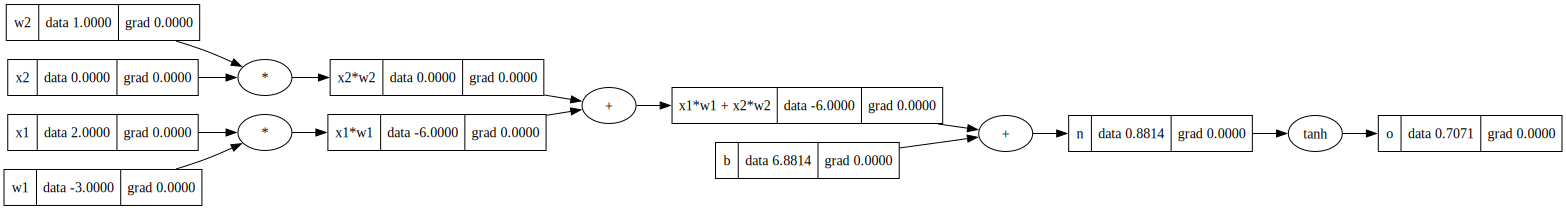

In [2767]:
draw_dot(o)

In [2768]:
o.grad = 1

In [2769]:
o._backward() # propagates the grad through tanh(n), i.e, the chain rule multiplication of the local derivative and the "global" derivative (or the derivative of whatever is on the immediate right of the arrow)

# 0.5 gets pushed to n

In [2770]:
n._backward() # 0.5 gets pushed to both x1w1x2w2 and b

In [2771]:
#what if we do b._backward?
b._backward()

#Nothing happens. This is because b is a leaf node, so the _backwards will follow the logic of the initialized self._backward = lambda: None

In [2772]:
x1w1x2w2._backward() #gradient of 0.5 on each nodes

In [2773]:
x1w1._backward()
x2w2._backward()

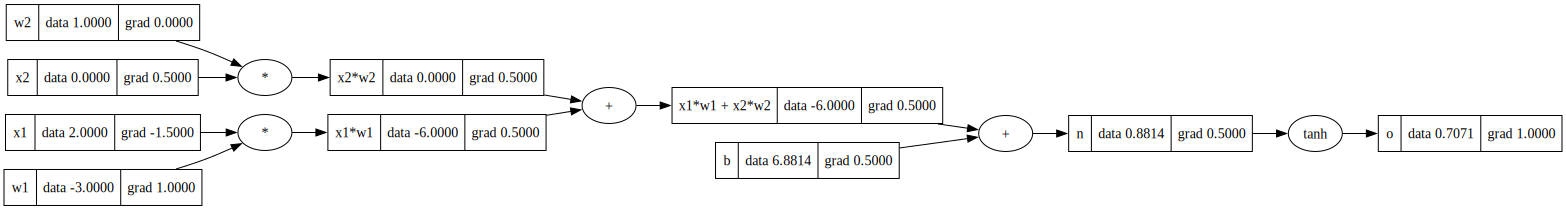

In [2774]:
#result:
draw_dot(o)

## Topological Sort
<!-- 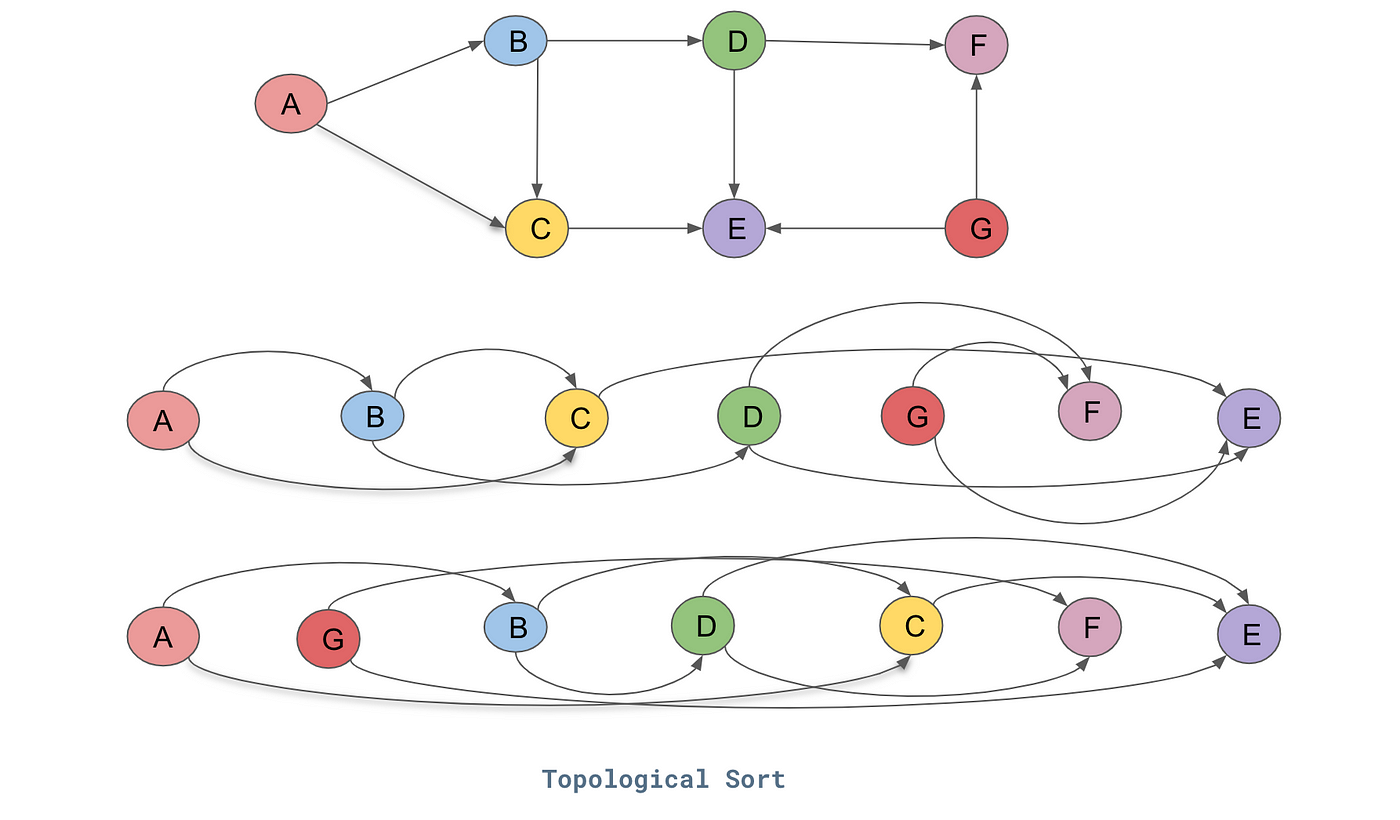 -->

What we've been doing so far is doing the backprop manually from `o` back to the neuron's children, and since we're doing it one-by-one, we are ensuring that the sorting is always from right to left. When we automate it, we can't expect the neuron to simply do the sorting from right to left on its own, so that's why we need topological sorting.

In [2775]:
o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v) # notice that the appending is done only after the loop has visited all ther children

build_topo(o)

for node in reversed(topo): # we're reversing the topo order since it's originally from left to right, while we want it to be right to left.
    node._backward()

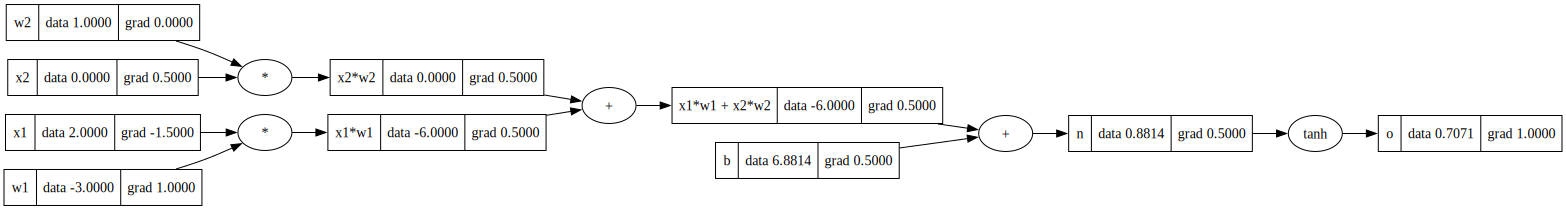

In [2776]:
draw_dot(o)

>**NOTE**
>
>This is good, but it's better to just hide all this in the Value class itself. So, let's do just that.

In [2777]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self.grad = 0.0

        self._backward = lambda: None
        
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward    
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * 1
        out._backward = _backward
        return out
    
    # HERE IS WHERE WE ADD IT:
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

    
a = Value(data=2.0, label='a')
b = Value(-3.0, label='b')
c = Value (10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

> Now redefining the values again:

In [2778]:
# redefining all the values again so that every grad gets initialized to zero
# inputs x1, x2 (a 2-dimensional neuron)
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

#weights w1, w2 (like the synaptic strings of a real biological neuron for each input)
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#bias of the neuron
b = Value(6.8813735870195432, label='b')

#basically what we're trying to do here is: x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n' #bascially is the activation without the activation function (if we look at the figure above, we can say n is the 'cell body' without the 'f' (activation function))

o = n.tanh(); o.label = 'o' # this basically is o = tanh(n) in math

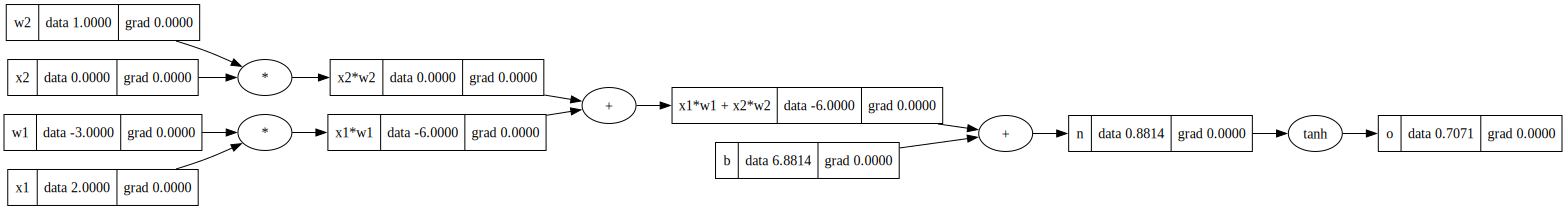

In [2779]:
draw_dot(o)

In [2780]:
o.backward()

### Realizing the bug in the backward function

There is a bug here. Our main issue here is that until now, we have been using our variables only once, so the gradients were getting calculated correctly and we did not notice any gradient errors. 

For the code below, we are using `a` two times for `b`, and we can see from the graph that `b.backward()` is calculating the gradient of `b` with respect to `a` twice. This is why we are getting the wrong gradient for `a` as `1` instead of `2` (since $d(2a)/da = 2$).

However, the gradient is `1` in the diagram because when we look at the `_backward` part of the `Value` class, we are doing `self.grad = other.data * out.grad` as well as `other.grad = self.data * out.grad`, which means that we are basically overwriting the gradient of `a` with yet another gradient of `a` (which is `1`) INSTEAD of adding the gradient to the existing gradient. We did not notice this before because we were using the variables only once. However, in this case, we are using `a` twice, so the gradient is getting overwritten.


```python
        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad

        out._backward = _backward
        return out
```

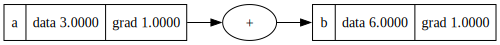

In [2781]:
a = Value(3.0, label = 'a')
b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)

---
So, let's solve this by adding the gradients instead of overwriting them.

In [2782]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self.grad = 0.0

        self._backward = lambda: None
        
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1 * out.grad #accumulating the gradients
            other.grad += 1 * out.grad #accumulating the gradients

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad #accumulating the gradients
            other.grad += self.data * out.grad #accumulating the gradients
        out._backward = _backward    
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * 1 #accumulating the gradients
        out._backward = _backward
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

    
a = Value(data=2.0, label='a')
b = Value(-3.0, label='b')
c = Value (10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

Now it should work for the same small example from above!

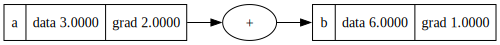

In [2783]:
a = Value(3.0, label = 'a')
b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)

---
Gradient of `b` w.r.t. `a` is now `2` as expected.

### Finally leaving clean `Value` class for moving forward
> __without the variables__

In [2784]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self.grad = 0.0

        self._backward = lambda: None
        
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1 * out.grad #accumulating the gradients
            other.grad += 1 * out.grad #accumulating the gradients

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad #accumulating the gradients
            other.grad += self.data * out.grad #accumulating the gradients
        out._backward = _backward    
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * 1 #accumulating the gradients
        out._backward = _backward
        return out
    
    # HERE IS WHERE WE ADD IT:
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

## Breaking up the tanh into its individual operations instead of making it a single operation

Original formula was:

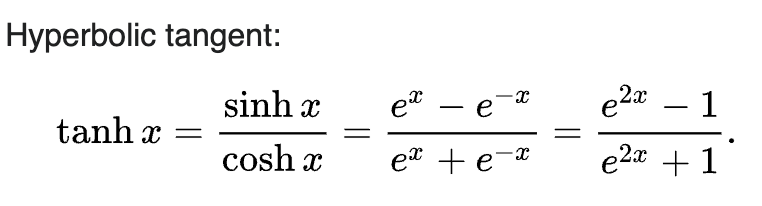

--- 

We will get the same result as before, but breaking it up into individual operations allows us to get a better perspective on the individual steps for calculating tanh. Better for learning purposes :)

### Ensuring that we can add numbers and floats to the variables directly

In [2785]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self.grad = 0.0

        self._backward = lambda: None
        
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # this is ensuring that we can add the numbers to the variables directly as well. Otherwise, we cannot really add numbers to variables like `a + 1` because 1 wouldn't have other.data because that makes no sense.

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) # same thing as above: leaving `other` alone if it's already an instance of Value, but if it is a number or float, it gets wrapped as an instance of Value
        
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward    
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * 1 
        out._backward = _backward
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [2786]:
# this should ensure the following work:

a = Value(2.0)
a + 1, a* 2

(Value(data=3.0), Value(data=4.0))

It works! However the following won't work. Why, I wonder.

In [2787]:
# 2 * a

#### Introduction of `__rmul__`

This is a method that is called when the object is on the right side of the multiplication operator. Basically, it is a fallback for the `*` operator. If, by any chance, Python can't do `2 * a`, it will check if it can do `a * 2` instead. This is done by the `__rmul__` method. The `__rmul__` method reverses the order of the operands for the multiplication. 

Let's implement this for the Value class.

In [2788]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self.grad = 0.0

        self._backward = lambda: None
        
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward    
        return out
    
    def __rmul__(self, other):
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * 1 
        out._backward = _backward
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

Now let's do it again perhaps

In [2789]:
a = Value(2.0)

2 * a

Value(data=4.0)

Works!

### Building up the tanh function, finally

Now, we need to know how to exponentiate ($e$) and divide ($/$) in our Value class, as per the tanh formula:

$ tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$

In [2790]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self.grad = 0.0

        self._backward = lambda: None
        
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward    
        return out
    
    def __rmul__(self, other): # here, self and value are the reversed versions of value & self. e.g., if we did 2 * a, rmul is doing a * 2 instead
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * 1 
        out._backward = _backward
        return out
    
    def exp(self): # addition of the exp function
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

Now that we have defined the exp function, let's see how it does.

In [2791]:
a = Value(2.0)
a.exp()

Value(data=7.38905609893065)

Nice.

#### Implementing the division

Instead of implementing the division directly, we can just implement the reciprocal of the denominator and then multiply the numerator with the reciprocal of the denominator.

Looks like the following:
$ a / b = a * (1 / b) $ => $ a * b^{-1} $

So,

$ tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$ => $ tanh(x) = (e^{2x} - 1) * (e^{2x} + 1)^{-1}$

To implement division like this, we also need to implement the power function, which we do below as well.

In [2792]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self.grad = 0.0

        self._backward = lambda: None
        
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward    
        return out
    
    def __pow__(self, other): # addition of the power function
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad # derivative of x^n is n*x^(n-1)
        out._backward = _backward
        return out
    
    def __rmul__(self, other): # here, self and value are the reversed versions of value & self. e.g., if we did 2 * a, rmul is doing a * 2 instead
        return self * other

    def __truediv__(self, other):
        return self * other**-1 # a / b = a * (1/b) = a * b^-1

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * 1 
        out._backward = _backward
        return out
    
    def exp(self): # addition of the exp function
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [2793]:
a = Value(2.0)
b = Value(4.0)

a / b

Value(data=0.5)

#### Implementing the subtraction function

Similar to how we implemented division with the help of multiplication, we can implement subtraction by implementing the negation function and then adding the two values.

$ a - b = a + (-b) $

In [5]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data 
        self.grad = 0.0

        self._backward = lambda: None
        
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad

        out._backward = _backward
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward    
        return out
    
    def __pow__(self, other): # addition of the power function
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad # derivative of x^n is n*x^(n-1)
        out._backward = _backward
        return out
    
    def __rmul__(self, other):
        return self * other
    
    def __radd__(self, other):
        return self + other

    def __truediv__(self, other):
        return self * other**-1 # a / b = a * (1/b) = a * b^-1
    
    def __neg__(self): # -self, the negation of a value
        return self * -1
    
    def __sub__(self, other): # self - other, subtraction
        return self + (-other) # a - b = a + (-b)
        # how does Python exactly know to perform the __neg__ function on -other? How exactly does it know that -other is the same as other.__neg__()? 
        # It doesn't. It just knows that -other is the same as other.__neg__(). It's just a convention that -other is the same as other.__neg__().

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

Now, let's go back again to our original neuron.

In [2795]:
# # inputs x1, x2 (a 2-dimensional neuron)
# x1 = Value(2.0, label='x1')
# x2 = Value(0.0, label='x2')

# #weights w1, w2 (like the synaptic strings of a real biological neuron for each input)
# w1 = Value(-3.0, label='w1')
# w2 = Value(1.0, label='w2')

# #bias of the neuron
# b = Value(6.8813735870195432, label='b')

# #basically what we're trying to do here is: x1*w1 + x2*w2 + b
# x1w1 = x1*w1; x1w1.label = 'x1*w1'
# x2w2 = x2*w2; x2w2.label = 'x2*w2'
# x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

# n = x1w1x2w2 + b; n.label = 'n' #bascially is the activation without the activation function (if we look at the figure above, we can say n is the 'cell body' without the 'f' (activation function))

# o = n.tanh(); o.label = 'o' # this basically is o = tanh(n) in math

# # addition:
# o.backward()

In [2796]:
# draw_dot(o)

> #### We will now break up the tanh that we see in this diagram into individual operations.

formula: $ tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$

In [2797]:
# # inputs x1, x2 (a 2-dimensional neuron)
# x1 = Value(2.0, label='x1')
# x2 = Value(0.0, label='x2')

# #weights w1, w2 (like the synaptic strings of a real biological neuron for each input)
# w1 = Value(-3.0, label='w1')
# w2 = Value(1.0, label='w2')

# #bias of the neuron
# b = Value(6.8813735870195432, label='b')

# x1w1 = x1*w1; x1w1.label = 'x1*w1'
# x2w2 = x2*w2; x2w2.label = 'x2*w2'
# x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

# n = x1w1x2w2 + b; n.label = 'n' #bascially is the activation without the activation function (if we look at the figure above, we can say n is the 'cell body' without the 'f' (activation function))

# e = (2*n).exp() # this means e = exp to the power of 2n

# # since tanh(n) is o:
# o = (e - 1) / (e + 1)
# o.backward()

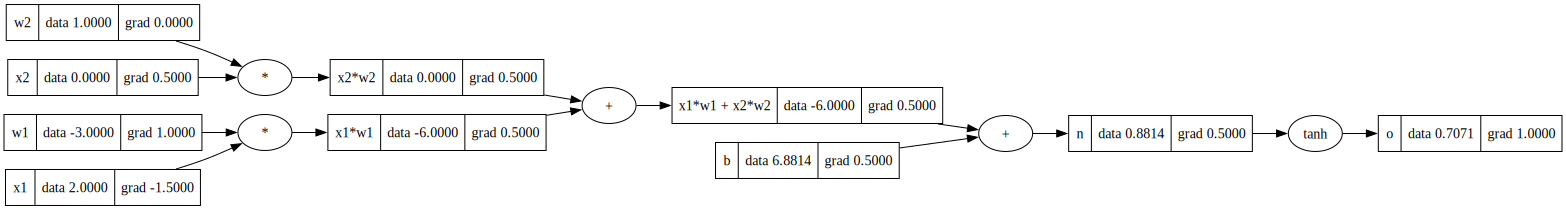

In [2798]:
draw_dot(o)

> So what is going on here in the diagram? 

This is exactly the same as the tanh formula, but broken down into individual operations of:

- $e^{2x}$ as `exp`
- $e^{2x} + 1$ as `+`
- $\frac{e^{2x} - 1}{e^{2x} + 1}$ as `**-1`


 This reveals to us that it doesn't really matter that much how we break down the operations, as long as we can calculate the gradients correctly and are able to do the forward as well as the backward passes. 

 ---

## Doing the exact same thing with PyTorch

In [6]:
import torch

Happenings below:

- We are defining the variables as `requires_grad=True` so that PyTorch knows that it needs to calculate the gradients for these variables. It's set to `False` by default.
- We are defining the operations as `torch` operations.
- The `.double()` is used to convert the variables to float64. This is because Python uses float64 by default, but the default element datatype for `torch.Tensor()` is float32. We want to make sure that we are comparing apples to apples.
- The `.item()` is used to get the actual value of the tensor. This is because the tensor itself is a wrapper around the actual value, and we need to get the actual value to compare it with our implementation.
- Also, torch already has its own `backward()` function, so we don't need to implement it ourselves. We can just call `loss.backward()` and it will calculate the gradients for us.

In [7]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print('o:', o.item())
o.backward()

print('-----')
print('x2:', x2.grad.item())
print('w2:', w2.grad.item())
print('x1:', x1.grad.item())
print('w1:', w1.grad.item())

o: 0.7071066904050358
-----
x2: 0.5000001283844369
w2: 0.0
x1: -1.5000003851533106
w1: 1.0000002567688737


In [2801]:
#Example tensor
torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 9, 5], [56, 1, 5]])

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  9.,  5.],
        [56.,  1.,  5.]])

---
## Building Out A Multi-Layer Perceptron in Micrograd

#### Starting with a single individual neuron

##### Index
- `nin` = number of inputs
- `nout` = number of outputs
- `w` = weights
- `b` = bias
- `self` is just a way to refer to the object itself. It's like `this` in JavaScript.
- `

In [2802]:
# # This cell is just for the sake of understanding the most basic things for my own understanding. The actual implementation will follow later.

# import random

# class Neuron:
#     def __init__(self, nin):
#         self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
#         # means that we're initializing the weights randomly between -1 and 1 for each input. _ is a throwaway variable, so we don't really care about it. _ in range(nin) means that we're doing something nin times, but we don't really care about the value of the iteration. We just want to do something nin times. All we care about is that we are creating weights for each input (since the loop will run exactly nin times) and not more than the number of inputs.

#         # in this case, what is the difference between nin and w and x? ... nin is the number of inputs, w is the weights, and x is the inputs. what does 'number of inputs' actually mean? It means the total number of input values (i.e., the number of x values). So, if we have 2 inputs, then nin would be 2. If we have 3 inputs, then nin would be 3. E.g., if we have 2 inputs, x1 and x2, then nin would be 2. If we have 3 inputs, x1, x2, and x3, then nin would be 3.

#         self.b = Value(random.uniform(-1, 1))

#     def __call__(self, x):
#         # __call__ is a special method in Python classes that allows us to call the object like a function. So, we can do n(x) instead of n.forward(x) or something like that. This is basically doing w1*x1 + w2*x2 + ... + wn*xn + b. Merely doing __init__ is just initializing the weights and the bias. This is actually doing the computation by multiplying the weights with the inputs and adding them all together.

#         print(list(zip(self.w, x)))
#         # this is just to show how zip works. It's basically zipping the weights and the inputs together. So, if we have 2 weights and 2 inputs, it would look like this: [(w1, x1), (w2, x2)]
#         return 0.0 # this is just a placeholder for now

# x = [2.0, 3.0] # x is a list of 2 inputs used as an example here

# n = Neuron(2) # we're creating a neuron with 2 inputs because x has 2 inputs

# n(x) # we're calling the neuron with the inputs x

# # why does n(x) mean Python is calling the __call__ method? 
# # Because we're using the () operator on the object n. The () operator is a shorthand for the __call__ method. So, when we do n(x), it's the same as doing n.__call__(x).

# # Also, let's look at this random printed output for instance (each time we run this, the output will be different):
# # [(Value(data=0.45101019838702205), 2.0), (Value(data=0.9695011472180683), 3.0)]
# # This is showing the weights and the inputs zipped together. The weights are Value objects with the data attribute set to some random number. The inputs are just the numbers 2 and 3.

# # The weights are initialized randomly, so they're different each time. In this case, the weights are 0.45 and 0.96. The inputs are 2 and 3. When we zip the weights and the inputs together, we get [(0.45, 2), (0.96, 3)]. This is what the print statement is showing. 


##### adding the activation to `__call__` to the above cell:

In [2803]:
# # This cell is ALSO just for the sake of understanding the most basic things for my own understanding. The actual implementation will follow later.

# import random

# class Neuron:
#     def __init__(self, nin):
#         self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
#         self.b = Value(random.uniform(-1, 1))

#     def __call__(self, x):
#         activation = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
#         # what is going on here? we're summing up the products of the weights and the inputs. So, if we have 2 weights and 2 inputs, it would look like this: w1*x1 + w2*x2. The sum function is summing up all these products. We're also adding the bias to this sum. In an even simpler way, we could say that we're doing w1*x1 + w2*x2 + ... + wn*xn + b.

#         # x inside __call__ is the input to the neuron. It's a list of input values. So, if we have 2 inputs, x1 and x2, then x would be [x1, x2]. If we have 3 inputs, x1, x2, and x3, then x would be [x1, x2, x3]. The number of elements in x is the number of inputs to the neuron.

#         # The sum() function is a built-in Python function that takes an iterable (like a list) and sums up all the elements. It also takes a second argument, which is the starting value. As a default, the starting value is 0. However, in our case, the starting value is self.b. So, we're summing up all the products of the weights and the inputs, and then adding the bias to it.

#         # Also, for the sum() function, we're using a generator expression instead of just doing activation = sum([wi*xi for wi, xi in zip(self.w, x)], self.b). Why? Because a generator expression is more memory-efficient than a list comprehension. We don't need to store all the products in a list, we can just sum them up directly.
        
#         # A generator expression is like a list comprehension, but it doesn't create a list. Instead, it creates a generator object, which is more memory-efficient. We're using the generator expression to create the products of the weights and the inputs. The generator expression must be parenthesized, so that's why we have the extra parentheses around it.

#         out = activation.tanh()
#         # out here means the output of the neuron, which will be important to represent the number of neurons when we build a MLP.
        
#         return out

# x = [2.0, 3.0]
# n = Neuron(2)
# n(x)

# # The output, let's say, is Value(data=-0.9998247434823524). We can see that the output is a Value object with the data attribute set to some number. This number is the output of the neuron. In this case, it's -0.99. This is the output of the neuron when the inputs are 2 and 3.

##### Adding a MLP class for 1 hidden layer:
(extending the above cell)

In [2804]:
# # This is YET ANOTHER cell the sake of understanding the most basic things for my own comprehension. The actual implementation will follow later in a much cleaner way withoout all these comments.

# import random

# class Neuron:
#     def __init__(self, nin):
#         self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
#         self.b = Value(random.uniform(-1, 1))

#     def __call__(self, x):
#         activation = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
#         out = activation.tanh()
#         return out
    
# class Layer:
#     def __init__(self, nin, nout):
#         # Here, nin is the number of inputs to the layer, and nout is the number of neurons in the layer. What does number of inputs to the layer mean? It means the number of input values that are passed to the layer. For example, if we have a 2-dimensional input with 3 neurons, then the number of inputs to the layer would be 2 and nin would be 2 (2-dimensional input means that the input is a list of 2 numbers/values
        
#         # Why does nout represent the number of neurons in the layer? Because each neuron in the layer has nout weights, so there are nout neurons in the layer. To be even more clear, nout is the number of outputs from the layer. Each neuron in the layer produces one output, so there are nout outputs in total. Meaning that there are nout neurons in the layer.

#         self.neurons = [Neuron(nin) for _ in range(nout)] # we're creating nout neurons in the layer, each with nin input (the dimensionality). This is done by looping over the range of nout and creating a neuron for each value. List comprehension usage again. For nin in Neuron(nin), is it going to replace the x in the __call__ method of the Neuron class? Yes, exactly. nin replaces x in the __call__ method of the Neuron class. So, each neuron in the layer has nin inputs.
        
#         # How exactly is this loop being done? We're creating a list of neurons by looping over the range of nout. For each value in the range, we're creating a neuron with nin inputs. So, we end up with a list of nout neurons, each with nin inputs.

#     def __call__(self, x): # here, x is the input to the layer. It's a list of nin numbers, where nin is the number of inputs to the layer.
#         outs = [n(x) for n in self.neurons] # we're calling each neuron in the layer with the input x. This is done by looping over the neurons in the layer and calling each one with x. The result is a list of outputs from each neuron in the layer.
#         return outs

# x = [2.0, 3.0]
# n = Layer(2, 3) # means a layer with 2 inputs and 3 neurons (or 3 outputs)
# n(x) # let's say the output is [Value(data=-0.9998247434823524), Value(data=-0.9998247434823524), Value(data=-0.9998247434823524)]. This is a list of 3 Value objects, each representing the output of a neuron in the layer.


#### Creating a MLP with 2 hidden layers

Like the following:

<img src="https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="300">

In [2805]:
# # This is YET ANOTHER cell the sake of understanding the most basic things for my own comprehension. The actual implementation will follow later in a much cleaner way withoout all these comments.

# import random

# class Neuron:
#     def __init__(self, nin):
#         self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
#         self.b = Value(random.uniform(-1, 1))

#     def __call__(self, x):
#         activation = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
#         out = activation.tanh()
#         return out
    
# class Layer:
#     def __init__(self, nin, nout):
#         self.neurons = [Neuron(nin) for _ in range(nout)]

#     def __call__(self, x):
#         outs = [n(x) for n in self.neurons]
#         return outs[0] if len(outs) == 1 else outs # this is being done to return a single output if there's only one neuron in the layer. If there are multiple neurons, then we return all the outputs. E.g., if outs is [Value(data=-0.9998247434823524), Value(data=-0.9998247434823524), Value(data=-0.9998247434823524)], then we return all the outputs. If outs is [Value(data=-0.9998247434823524)], then we return just the single output of Value(data=-0.9998247434823524).
    

# class MLP:
#     def __init__(self, nin, nouts):
#         # here, nin represents the number of inputs to the MLP (specifically, the number of inputs to the first layer). nouts is a list of the number of outputs from each layer, not including the input layer. So, if we have 3 inputs, 4 outputs in the first layer, 4 outputs in the second layer, and 1 output in the final layer, then nin would be 3 and nouts would be [4, 4, 1].

#         size = [nin] + nouts
#         # we're creating a list of sizes for the MLP. This list includes the number of inputs to the MLP (nin) and the number of outputs from each layer (nouts). So, if we have 3 inputs, 4 outputs in the first layer, 4 outputs in the second layer, and 1 output in the final layer, then size would be [3, 4, 4, 1]. Why is nin wrapped in a list? Because we want to concatenate it with nouts as nouts is already a list. For demonstration: If nin is 3 and nouts is [4, 4, 1], then size would be [3] + [4, 4, 1] = [3, 4, 4, 1].

#         self.layers = [Layer(size[i], size[i+1]) for i in range(len(size) - 1)]
#         # we're creating the layers for the MLP. This is done by looping over the range of the length of the size list minus 1 (minus 1 because python is 0-indexed and we also don't need to create a layer for the last element in the size list). We're creating each Layer by taking the ith element in the size list as the number of inputs and the i+1th element as the number of outputs. So, if we have 3 inputs, 4 outputs in the first layer, 4 outputs in the second layer, and 1 output in the final layer, then we would create a layer with 3 inputs and 4 outputs, another layer with 4 inputs and 4 outputs, and a final layer with 4 inputs and 1 output. Step-by-step, this is what happens:

#         # 1. Layer(3, 4), Layer(4, 4), Layer(4, 1) are created.
#         # 2. These layers are stored in a list called self.layers.
#         # 3. By the way, Layer(3, 4) makes use of the Layer class we defined earlier. What happens there in each step?
#         # 3.a. For Layer(3, 4), it first creates a Neuron with 3 inputs (because of the nin argument). This Neuron is stored in the neurons list of the Layer. Then, it creates another Neuron with 3 inputs. This Neuron is also stored in the neurons list of the Layer. This is done 4 times because of the range(nout) loop. So, we end up with 4 Neurons in the neurons list of the Layer. This is done for each Layer in the MLP.
#         # 4. So, at the end of this, we have a list of Layers, each with a list of Neurons. This represents the structure of the MLP.

#     def __call__(self, x):
#         # here, x is the input to the MLP. It's a list of nin numbers, where nin is the number of inputs to the MLP. So, if we have 3 inputs, x1, x2, and x3, then x would be [x1, x2, x3]. If we have 2 inputs, x1 and x2, then x would be [x1, x2]. The number of elements in x is the number of inputs to the MLP.

#         for layer in self.layers:
#             x = layer(x)
#             # layer(x) is calling the Layer with the input x. This is done by looping over the layers in the MLP and calling each layer with the input x. The result is the output of the MLP. Let's break this down step-by-step:

#             # 1. if x = [2.0, 3.0, -1.0], then layer(x) in the first iteration would be layer([2.0, 3.0, -1.0]), i.e., Layer(3, 4)([2.0, 3.0, -1.0]). What exactly happens in the calculation here? Layer(3, 4)([2.0, 3.0, -1.0]) means: for each neuron in the layer, calculate the output by multiplying the weights with the inputs, summing them up, and passing the sum through the tanh activation function. So, if we have 4 neurons in the layer (since nout = 4 here), we would do this calculation 4 times. The output of the layer would be a list of 4 numbers, one for each neuron. This output would then be passed to the next layer in the next iteration. Output, let's say, is [1.0, 2.0, 3.0, 4.0]. 

#             # 2. if the output of the first layer is [1.0, 2.0, 3.0, 4.0], then layer(x) in the second iteration would be Layer(4, 4)([1.0, 2.0, 3.0, 4.0]). This would give us the output of the second layer. This output would then be passed to the next layer in the next iteration.

#             # 3. if the output of the second layer is [5.0, 6.0, 7.0, 8.0], then layer(x) in the third iteration would be Layer(4, 1)([5.0, 6.0, 7.0, 8.0]). This would give us the output of the final layer. This output would be the final output of the MLP.

#             # 4. So, the final output of the MLP is the output of the final layer.

#         return x

# x = [2.0, 3.0, -1.0]

# n = MLP(3, [4, 4, 1]) # here, we're creating an MLP with 3 inputs, 4 outputs in the first layer, 4 outputs in the second layer, and 1 output in the final layer.

# n(x)

#### Finally, a cleaner version without comments

> This is what we will use.

In [2806]:
# import random

# class Neuron:
#     def __init__(self, nin):
#         self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
#         self.b = Value(random.uniform(-1, 1))

#     def __call__(self, x):
#         activation = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
#         out = activation.tanh()
#         return out
    
# class Layer:
#     def __init__(self, nin, nout):
#         self.neurons = [Neuron(nin) for _ in range(nout)]

#     def __call__(self, x):
#         outs = [n(x) for n in self.neurons]
#         return outs[0] if len(outs) == 1 else outs
    
# class MLP:
#     def __init__(self, nin, nouts):
#         size = [nin] + nouts
#         self.layers = [Layer(size[i], size[i+1]) for i in range(len(size) - 1)]

#     def __call__(self, x):
#         for layer in self.layers:
#             x = layer(x)
#         return x

# x = [2.0, 3.0, -1.0]
# n = MLP(3, [4, 4, 1])
# n(x)

---
## Creating a Tiny Dataset & Writing the Loss Function



In [2807]:
# xs = [
#   [2.0, 3.0, -1.0],
#   [3.0, -1.0, 0.5],
#   [0.5, 1.0, 1.0],
#   [1.0, 1.0, -1.0],
# ]

# ys = [1.0, -1.0, -1.0, 1.0] # these are the desired target outputs for each input of [2.0, 3.0, -1.0], [3.0, -1.0, 0.5], [0.5, 1.0, 1.0], and [1.0, 1.0, -1.0] respectively.

# ypredicted = [n(x) for x in xs] # this is the predicted output of the MLP for each input in xs. This is done by looping over the inputs in xs and calling the MLP with each input.

# ypredicted

In [2808]:
# loss = Value(0) # done to initialize the loss to 0 each time we run this cell
# for ygroundtruth, yout in zip(ys, ypredicted):
#     loss = loss + (yout - Value(ygroundtruth))**2
    
# # This is the loss of the MLP. It's the sum of the squared differences between the predicted outputs and the ground truth outputs.
# # We need to convert ygroundtruth and yout to Value objects as they are both numerical values.
# # This is done by looping over the ground truth outputs and the predicted outputs and calculating the squared difference for each pair.

# # what is the ygroundtruth, yout in zip(ys, ypredicted) doing? It's zipping the ground truth outputs (ys) and the predicted outputs (ypredicted) together. So, if ys is [1.0, -1.0, -1.0, 1.0] and ypredicted is [0.5, -0.5, -0.5, 0.5], then zip(ys, ypredicted) would be [(1.0, 0.5), (-1.0, -0.5), (-1.0, -0.5), (1.0, 0.5)]. So, in this example, ygroundtruth would be 1.0 and yout would be 0.5 in the first iteration, -1.0 and -0.5 in the second iteration, and so on.

# # another way to write the code above is:
# # loss = sum((yout - Value(ygroundtruth))**2 for ygroundtruth, yout in zip(ys, ypredicted))
# # this was the orginal code, but since it is not working for me, I'll stick to the code at the top of this cell.

# loss

In [2809]:
# loss.backward()

In [2810]:
# n.layers[0].neurons[0].w[0].grad

---
## Collecting all the Parameters of the Neural Network

In [8]:
import random

class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        activation = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = activation.tanh()
        return out
    
    def parameters(self): # addition of the parameter method to collect all the parameters of the neuron so that we can collectively nudge them when we need to minimize the loss
        return self.w + [self.b]
    
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self): # adding parameters method to the Layer
        params = []
        for neuron in self.neurons:
            ps = neuron.parameters()
            params.extend(ps)
        return params
    # or a shorter to write the parameters method is:
    # def parameters(self):
        # return [p for neuron in self.neurons for p in neuron.parameters()]
    
class MLP:
    def __init__(self, nin, nouts):
        size = [nin] + nouts
        self.layers = [Layer(size[i], size[i+1]) for i in range(len(size) - 1)]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self): # adding parameters method to the MLP
        params = []
        for layer in self.layers:
            ps = layer.parameters()
            params.extend(ps)
        return params
    # or a shorter to write the parameters method is:
    # def parameters(self):
        # return [p for layer in self.layers for p in layer.parameters()]


# why are there 3 different parameters methods in the Neuron, Layer, and MLP classes? how are they different? 

# The parameters method in the Neuron class returns the weights and the bias of the neuron. This is a hierarchical structure, so the parameters method starts at the lowest level (the neuron) and collects the parameters of the neuron. Then, the parameters method in the Layer class collects the parameters of all the neurons in the layer. Finally, the parameters method in the MLP class collects the parameters of all the layers in the MLP. This is a way to collect all the parameters of the MLP in a hierarchical manner. In a way, we can understand this like this: firstly, there's the MLP with 3 inputs, 2 hidden layers with 4 neurons each, and 1 output. This means the MLP parameters includes parameters of the 2 hidden layers and the output layer. Each one of those layers has 4 neurons, so the Layer parameters includes parameters of the 4 neurons for each layer. And the Neural parameters includes the weights and bias of the neuron. So it's all in a hierarchical manner; these 3 different parameters aren't actually "different" per se; they're just connected to each other and help collect all the parameters of the MLP through concatenation and reaching the lowest level of the hierarchy (each neuron for each layer for the total MLP).

# ------------------------------

# Key differences between the parameters methods in the Neuron, Layer, and MLP classes:

# Hierarchy Level:

# Neuron: Focuses on individual neuron parameters.
# Layer: Aggregates parameters from all neurons in a single layer.
# MLP: Collects parameters from all layers, representing the entire network.

# Aggregation:
# Neuron: Returns a simple list of weights and a bias.
# Layer: Uses a loop or list comprehension to gather parameters from multiple neurons.
# MLP: Uses a nested list comprehension to gather parameters from multiple layers, each containing multiple neurons.

# Scope and Use:
# Neuron: Useful for operations that need to manipulate or access parameters at the neuron level.
# Layer: Useful for operations at the layer level, such as layer-wise updates or analyses.
# MLP: Essential for global operations like training, where all parameters need to be adjusted simultaneously.

In [2812]:
# x = [2.0, 3.0, -1.0]
# n = MLP(3, [4, 4, 1])
# n(x)

In [2813]:
# n.parameters()

In [2814]:
# len(n.parameters())

In [2815]:
# xs = [
#   [2.0, 3.0, -1.0],
#   [3.0, -1.0, 0.5],
#   [0.5, 1.0, 1.0],
#   [1.0, 1.0, -1.0],
# ]

# ys = [1.0, -1.0, -1.0, 1.0]

# ypredicted = [n(x) for x in xs] 

# ypredicted

In [2816]:
# loss = Value(0)
# for ygroundtruth, yout in zip(ys, ypredicted):
#     loss = loss + (yout - Value(ygroundtruth))**2

# loss

In [2817]:
# loss.backward()

In [2818]:
# n.layers[0].neurons[0].w[0].grad

In [2819]:
# n.layers[0].neurons[0].w

In [2820]:
# n.layers[0].neurons[0].w[0].data

In [2821]:
# n.layers[0].neurons[0].b

#### Logic behind the `parameters()` function

- It's being done one-by-one starting from the first hidden layer to the output layer. The input is not included because these are considered as "constants", or in other words, the input layer is not a parameter that we want to optimize since it's like a source of data. We don't wanna optimize that, but rahter the weights and biases of the hidden layers and the output layer.

<img src = "https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="300">

<br>So, if we look at the diagram above, we are starting from the top-most neuron of the first hidden layer, then going to the second neuron of the first hidden layer, and so on. Then we are moving to the first neuron of the second hidden layer, and so on. Finally, we are moving to the output layer.
<br>

- Let's assume that `n.parameters()` gives us something like the following for the above diagram:

```python
[Value(data=0.5327646834639466),
 Value(data=-0.6195645325837145),
 Value(data=-0.5166370500806821),
 Value(data=0.7426643892656088),
 Value(data=0.6407664158165052),
 Value(data=-0.6276051694431675),
 Value(data=-0.20423211546384046),
 Value(data=-0.7939161099109258),
 Value(data=0.2271643323198711),
 Value(data=-0.7957107555011054),
 Value(data=-0.8538424906153232),
 Value(data=0.3223379345070758),
 Value(data=-0.3075458661921069),
 Value(data=0.45103718548036076),
 Value(data=0.4607484762132865),
 Value(data=0.8970403641711377),
 Value(data=0.1317806277173732),
 Value(data=-0.4836556086884207),
 Value(data=0.90460198542612),
 Value(data=-0.9771217533993133),
 Value(data=-0.5954158451080529),
 Value(data=0.2918125103895257),
 Value(data=-0.5097895562445967),
 Value(data=0.5667388833314813),
 Value(data=0.8663254471572848),
...
 Value(data=0.004090363517709195),
 Value(data=-0.8539336651127407),
 Value(data=-0.31843394770246136),
 Value(data=0.4139347413500978),
 Value(data=0.2445424977846633)]
```

This has a very logical order to it. For the first neuron of the first hidden layer, we know that it has 3 inputs. Therefore, it must have 3 weights and 1 bias. So, the first 4 values in the list above will be the weights and the bias of the first neuron of the first hidden layer. So, it's something like:

```python
 n.layers[0].neurons[0].w and n.layers[0].neurons[0].b
 ```

which will respectively give us:
```python
[Value(data=0.5327646834639466),
Value(data=-0.6195645325837145),
Value(data=-0.5166370500806821)]
```
> (the weights of the first neuron of the first hidden layer)

and
    
```python    
Value(data=0.7426643892656088)
```
> (the bias of the first neuron of the first hidden layer)

- The next 4 values will be the weights and the bias of the second neuron of the first hidden layer. So, it's something like:

```python
n.layers[0].neurons[1].w
```

and

```python
n.layers[0].neurons[1].b
```

which will respectively give us:
```python
[Value(data=0.6407664158165052),
Value(data=-0.6276051694431675),
Value(data=-0.20423211546384046)]
```
> (the weights of the second neuron of the first hidden layer)

and

```python
Value(data=-0.7939161099109258)
```

> (the bias of the second neuron of the first hidden layer)

and so on.

---
## Doing the Gradient Descent Optimization Manually, Training the Neural Network

In [2822]:
# xs = [
#   [2.0, 3.0, -1.0],
#   [3.0, -1.0, 0.5],
#   [0.5, 1.0, 1.0],
#   [1.0, 1.0, -1.0],
# ]

# ys = [1.0, -1.0, -1.0, 1.0]

# ypredicted = [n(x) for x in xs] 

# ypredicted

In [2823]:
# # this is just me moving the original calculation here. values are the exact same.
# ypredicted = [n(x) for x in xs]
# loss = Value(0)
# for ygroundtruth, yout in zip(ys, ypredicted):
#     loss = loss + (yout - Value(ygroundtruth))**2

# loss

above is the original result, below will be the result after gradient descent.

In [2824]:
# ypredicted = [n(x) for x in xs]
# loss = Value(0)
# for ygroundtruth, yout in zip(ys, ypredicted):
#     loss = loss + (yout - Value(ygroundtruth))**2

# loss

In [2825]:
# loss.backward()

In [2826]:
# # applying a small gradient descent step to the parameters of the MLP
# for param in n.parameters():
#     param.data += -0.1 * param.grad

In [2827]:
# # reevaluating the loss after the gradient descent step
# ypredicted

In [2828]:
# n.parameters()

> This is it. We have trained our neural network using gradient descent. We have seen how we can calculate the gradients of the loss function with respect to the weights and biases of the neural network using backpropagation. We have also seen how we can update the weights and biases using the gradients to minimize the loss function.

---

## Making it a bit better through looping

In [2829]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.9699118620681938)

In [2830]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]

In [2831]:
for k in range(20): #20 as in 20 epochs or step sizes or iterations

    # forward pass
    ypredicted = [n(x) for x in xs]
    # loss = Value(0)
    # for ygroundtruth, yout in zip(ys, ypredicted):
    #     loss = loss + (yout - Value(ygroundtruth))**2

    loss = sum((yout - ygroundtruth)**2 for ygroundtruth, yout in zip(ys, ypredicted))

    # backward pass
    for param in n.parameters():
        param.grad = 0.0 # reset the gradients to 0 before the backward pass
    loss.backward()

    # gradient descent step
    for param in n.parameters():
        param.data += -0.005 * param.grad
    
    print(k, loss.data)

0 7.495646681721896
1 7.4521199223574195
2 7.407813041937109
3 7.3622685610006195
4 7.314526952750231
5 7.26324834011535
6 7.207014241183225
7 7.144884987505861
8 7.077098713805658
9 7.005425019776099
10 6.932667824632897
11 6.861648826962455
12 6.794741146235172
13 6.734375354891097
14 6.683718838671066
15 6.646505383515434
16 6.625851324098028
17 6.62283547953675
18 6.6358172099238715
19 6.660950286077702


In [2832]:
ypredicted

[Value(data=-0.7637707406052545),
 Value(data=-0.9418710831652823),
 Value(data=-0.895169505631217),
 Value(data=-0.8803442921817568)]

Frankly stating, this is nowhere close; it's downright hiddeous. For some reason, the loss is just not going down as well as I would like it to. I'll give it a look sometime later, but this was just for me to understand how backpropagation works and how we can build a simple neural network from scratch.

---

## Update on the bug

I wrote 1 instead of out.grad in the tanh implementation in the Value class! This is why the loss was not going down as expected. I'll fix this and run the code again.

In [16]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.8905620003652533)

In [17]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]

In [18]:
for k in range(50): #50 as in 50 epochs or step sizes or iterations

    # forward pass
    ypredicted = [n(x) for x in xs]
    # loss = Value(0)
    # for ygroundtruth, yout in zip(ys, ypredicted):
    #     loss = loss + (yout - Value(ygroundtruth))**2

    loss = sum((yout - ygroundtruth)**2 for ygroundtruth, yout in zip(ys, ypredicted))

    # backward pass
    for param in n.parameters():
        param.grad = 0.0 # reset the gradients to 0 before the backward pass
    loss.backward()

    # gradient descent step
    for param in n.parameters():
        param.data += -0.05 * param.grad
    
    print(k, loss.data)

0 5.240445306884147
1 2.0498804406018127
2 1.0311903496373622
3 0.5593010092897044
4 0.3241898791050676
5 0.22777879019912184
6 0.17737485561160263
7 0.1445488546638248
8 0.12161679686510107
9 0.10475574438240297
10 0.09186913874714137
11 0.08171791680211535
12 0.07352549208346994
13 0.06678162001107947
14 0.06113783676975423
15 0.05634837111940459
16 0.052235092194154356
17 0.04866584535393896
18 0.0455405844834991
19 0.04278222150024298
20 0.040330426370331136
21 0.0381373271018303
22 0.03616446509200698
23 0.03438059910729659
24 0.03276009482201947
25 0.0312817259183784
26 0.029927769325910725
27 0.028683313898566265
28 0.027535726134145823
29 0.02647423292205759
30 0.0254895925285863
31 0.024573832835540023
32 0.02372004135471577
33 0.02292219547535401
34 0.022175024247292466
35 0.021473895083510247
36 0.020814720303567465
37 0.020193879587009838
38 0.019608155270025726
39 0.01905467807509326
40 0.018530881366035055
41 0.018034462408775292
42 0.017563349419548038
43 0.0171156734181

In [19]:
ypredicted

[Value(data=0.9635545174679082),
 Value(data=-0.953495629206274),
 Value(data=-0.9212323622578242),
 Value(data=0.9282924211001806)]

This is very good! 